In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential  # 층을 만들기 위한 모델 베이스
from tensorflow.keras.layers import Dense 

In [2]:
Data_set = np.loadtxt('data/ThoraricSurgery3.csv', delimiter=',')
Data_set.shape # x의 요소 1 ~ 16, y의 요소 17

(470, 17)

In [3]:
# 데이터를 X와 y로 설정
X = Data_set[:,0:-1] # 0 부터 -1의 앞 까지
y = Data_set[:,-1]
print(X.shape, y.shape)

(470, 16) (470,)


In [4]:
#모델 설정, 생성
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu')) # 1개층에 30개의 요소 추가 및 Dense layer 추가  (input_dim= 입력층)
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=('accuracy'))# 실행할 컴파일 설정(출력하고 싶은 언어{프로그램언어}로변환)
history = model.fit(X,y, epochs=10, batch_size=32)        # ^ 불러올 항목          batch_size = 한번에 가져오는 개수

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 3.9514 - accuracy: 0.8511
Epoch 2/10
15/15 [==============================] - 0s 1ms/step - loss: 2.9399 - accuracy: 0.8511
Epoch 3/10
15/15 [==============================] - 0s 338us/step - loss: 1.9077 - accuracy: 0.8489
Epoch 4/10
15/15 [==============================] - 0s 1ms/step - loss: 0.9909 - accuracy: 0.8447
Epoch 5/10
15/15 [==============================] - 0s 609us/step - loss: 0.5105 - accuracy: 0.8064
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8447
Epoch 7/10
15/15 [==============================] - 0s 775us/step - loss: 0.4390 - accuracy: 0.8511
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8511
Epoch 9/10
15/15 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8532
Epoch 10/10
15/15 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8532


# Chapter 11

In [5]:
dia_df=pd.read_csv('data/pima-indians-diabetes3.csv')
dia_df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# 각 요소들의 상관관계
dia_df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


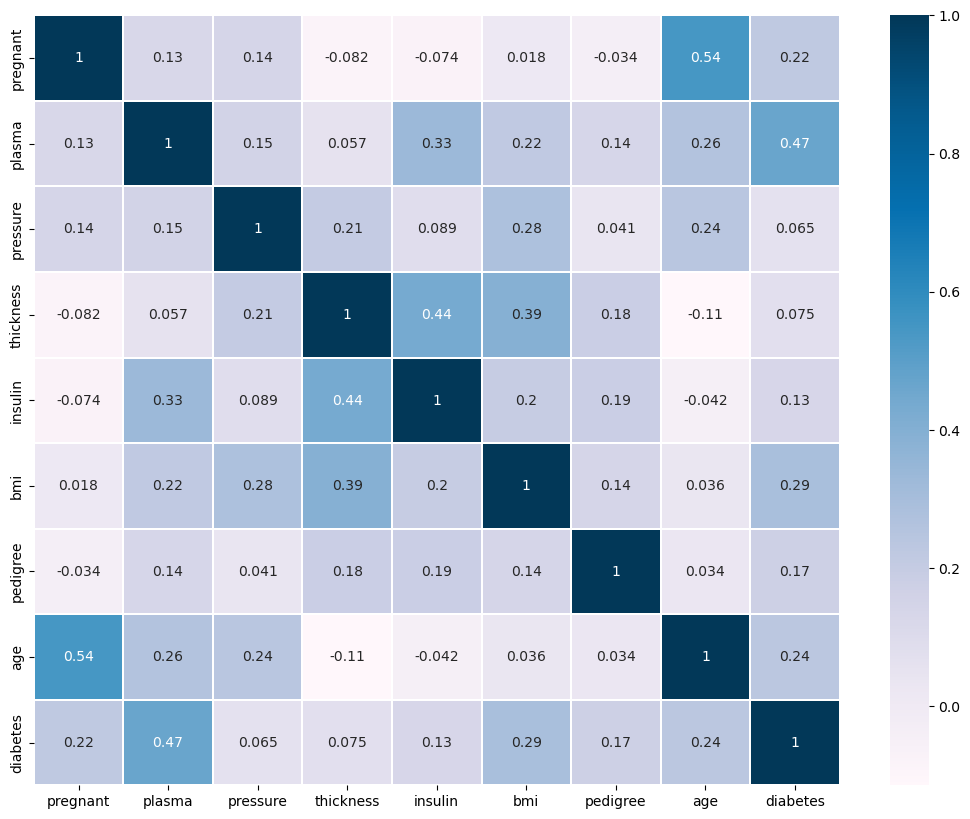

In [7]:
plt.figure(figsize=(13,10))
sns.heatmap(dia_df.corr(),linewidths=0.1, linecolor='white',annot=True,cmap='PuBu')
plt.show()

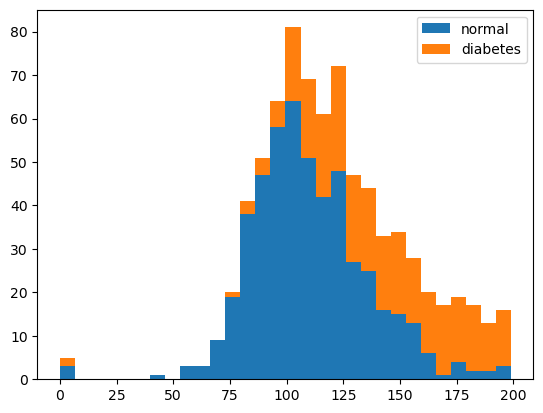

In [8]:
plt.hist(x=[dia_df.plasma[dia_df.diabetes == 0],dia_df.plasma[dia_df.diabetes == 1]],
            bins = 30, histtype='barstacked',label=['normal','diabetes'])
plt.legend()
plt.show()

In [9]:
dia_output=dia_df['diabetes']
X=dia_df.drop(columns='diabetes')
y= dia_df.iloc[:,-1]
print(X.shape,y.shape)

(768, 8) (768,)


In [10]:
# 모델 생성, 모델 실행
model= Sequential()
model.add(Dense(20,input_dim=8,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=500,batch_size=32)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 5.1774 - accuracy: 0.6172
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 2.3894 - accuracy: 0.6198
Epoch 3/500
24/24 [==============================] - 0s 769us/step - loss: 1.4306 - accuracy: 0.6289
Epoch 4/500
24/24 [==============================] - 0s 1ms/step - loss: 1.0433 - accuracy: 0.6523
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8012 - accuracy: 0.6510
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.6615
Epoch 7/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.6615
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6484
Epoch 9/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6784
Epoch 10/500
24/24 [==============================] - 0s 847us/step - loss: 0.6449 - accuracy: 0.6693
Epoch

In [11]:
dia_output=dia_df['diabetes']
X1=dia_df.drop(columns=['diabetes','pregnant','pressure','thickness','pedigree'])
print(X.shape,y.shape)

(768, 8) (768,)


In [12]:
model= Sequential()
model.add(Dense(20,input_dim=4,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X1,y,epochs=500,batch_size=32)

Epoch 1/500
24/24 [==============================] - 1s 1ms/step - loss: 9.7883 - accuracy: 0.4010
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 2.7947 - accuracy: 0.5820
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.4525 - accuracy: 0.5573
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 1.2423 - accuracy: 0.5091
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 1.1370 - accuracy: 0.5078
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0277 - accuracy: 0.5130
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9739 - accuracy: 0.5078
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9169 - accuracy: 0.5130
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5208
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5273
Epoch 11/

In [14]:
# 유방암 데이터 가지고 오기
from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()
X= Data['data']
y= Data['target']
col=Data['feature_names']

In [15]:
df=pd.DataFrame(X,columns =col)

In [16]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
